# Casos positivos diarios de Covid en México

Esta es la presentación final de la materia de Visualización de datos para la toma de decisiones.

El analisis que se presentará a continuación, será acerca de los casos positivos que se tuvieron durante el mes de marzo del 2020 hasta el mes de agosto del año en curso de la actual pandemia en nuestro pais.

We need `seaborn`, which shall be included it in `requirements.txt` file

# Descripción de conjunto de datos

La fuente de la que provienen estos datos se trata de DataMéxico, un sitio web en el cual puedes explorar, visualizar, comparar, y desacargar datos mexicanos, ya sea de ciudades, lugares industrias y servicio. En este caso se tiene el registro de casos confirmados de coronavirus.

Nombres de las variables:
-Year
-Querter ID
-Month ID
-Month
-Day
-Time ID
-Time
-Nation ID
-Nation
-Accum cases
-AVG 7 Days Accum Cases
-AVG 7 Days Daily Cases
-Rate Daily Cases
-Rate Accum Cases
-Days from_50 cases
-Style

Tipos de variables:
Dentro de la base de datos se encuentran variables categóricas como la nacionalidad (Nation ID y Nation), Month ID y Month. Style es una variable binaria. No hay ordinales. El resto de variables son numéricas,  de las cuales la mayoria son discretas, además hay unas pocas variables continuas.

Estas son algunas de las principales librerias que se usaran:

In [1]:
import seaborn as sns; sns.set()
import pandas as pd
pd.set_option('max_columns', None)
import re
import matplotlib.pyplot as plt

Se lee la base de datos que se utilizara para su análisis:

In [2]:
df= pd.read_csv('datasets/Casos-positivos-diarios-en-Mexico-Promedio-movil-de-7-dias.csv')
df

,Year,Quarter_ID,Quarter,Month_ID,Month,Day,Time_ID,Time,Nation_ID,Nation,Accum_Cases,Daily_Cases,AVG_7_Days_Accum_Cases,AVG_7_Days_Daily_Cases,Rate_Daily_Cases,Rate_Accum_Cases,Days_from_50_Cases,Style
0,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,327,37,1.892857e+02,36.714287,0.028953,0.255884,10,solid
1,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,403,76,2.361429e+02,46.857143,0.059472,0.315356,11,solid
2,2020,1,Q1,3,2020-03,17,20200317,17/03/2020,mex,México,507,104,2.954286e+02,59.285713,0.081382,0.396738,12,solid
3,2020,1,Q1,3,2020-03,18,20200318,18/03/2020,mex,México,623,116,3.657143e+02,70.285713,0.090772,0.487510,13,solid
4,2020,1,Q1,3,2020-03,19,20200319,19/03/2020,mex,México,774,151,4.517143e+02,86.000000,0.118160,0.605670,14,solid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2021,3,Q3,8,2021-08,21,20210821,21/08/2021,mex,México,3246602,5533,3.206248e+06,14391.857420,4.329682,2540.530518,534,dashed
525,2021,3,Q3,8,2021-08,22,20210822,22/08/2021,mex,México,3250802,4200,3.220372e+06,14123.286130,3.286583,2543.817139,535,dashed
526,2021,3,Q3,8,2021-08,23,20210823,23/08/2021,mex,México,3264355,13553,3.233355e+06,12983.142580,10.605492,2554.422607,536,dashed
527,2021,3,Q3,8,2021-08,24,20210824,24/08/2021,mex,México,3271079,6724,3.244537e+06,11182.571290,5.261663,2559.684326,537,dashed


# Meses con mas contagios

En la siguiente grafica se comparan los casos diarios con respecto a los meses, a simple vista se pudiera interpretar que no se tiene una correlación. 
Sin embargo, lo que se quiere responder con este grafico es *¿Cuales meses del año se tiene mayor contagio?.*
Y para esto hay que identificar los valores atipicos que se tienen, los cuales son los numeros de contagios más altos, y si los interpretamos correctamente, se puede ver que los meses con más contagios son: Junio, Julio, Diciembre y Enero; Los cuales son los meses de vacaciones.

Lo que lleva a concluir que los meses anterior mensionados hay más riesgos de contagio, debido a que las personas suelen salir más durante esas epocas del año.

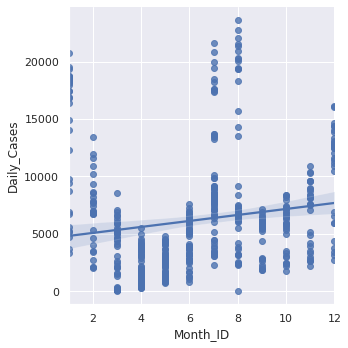

In [3]:
sns.lmplot(x= 'Month_ID',
          y = 'Daily_Cases',
          data = df)

plt.show()

# Contagios diarios y dia de pandemia

La siguiente regresión de la grafica de dispersión muestra que tan relacionado esta el promedio de casos acumulados de 7 dias, y el número del dia de la pandemia desde que se tuvo el contaio número 50.
En la cual se ve que se correlacioan bastante.

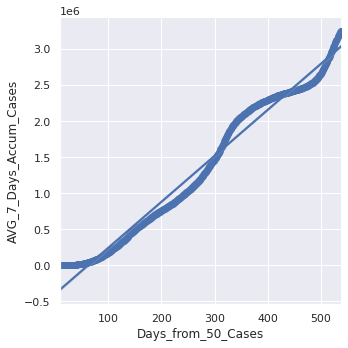

In [4]:
sns.lmplot(x= 'Days_from_50_Cases',
          y = 'AVG_7_Days_Accum_Cases',
          data = df)

plt.show()

Con esta correlación se puede verificar lo visto graficamente anteriormente, pues la correlación entre más cercano a 1 o -1 más fuerte es.

In [5]:
vars=['Days_from_50_Cases','AVG_7_Days_Accum_Cases']
relacion=df[vars]

relacion[vars].corr()

,Days_from_50_Cases,AVG_7_Days_Accum_Cases
Days_from_50_Cases,1.000000,0.990389
AVG_7_Days_Accum_Cases,0.990389,1.000000


# Predicción

En base a lo analizado anteriormente, y con el fin de poder saber ¿Cuantos contagios se tendrán en una fecha especifica?

Se realiza una predicción en la que se obtienen los numeros de casos positivos a covid en México en base a los dias transucurridos despues del contagio número 50

In [6]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
X = pd.DataFrame (df['Days_from_50_Cases'])
Y = pd.DataFrame (df['AVG_7_Days_Accum_Cases'])

model_lm = lm.fit(X,Y)
model_lm

days_from_50_cases = pd.DataFrame([300])
predict_AVG_7_days_Accum_Cases = model_lm.predict(days_from_50_cases)
predict_AVG_7_days_Accum_Cases

array([[1517102.27744298]])

# Frecuencia de contagios diarios

Con el siguiente box plot e hsitgorama, podemos ver la frecuencia de contagios diarios que se tiene, y se puede interpretar que normalmente se tienen contagiso diarios de entre 2.5 y 7.5 miles de casos positivos, siendo lo más común que se tengan cerca de 5k casos. sin embargo se tienen registros de más de 15,000 personas contagiadas diariamente, e incluso alcanzado más de 20,000 por dia.

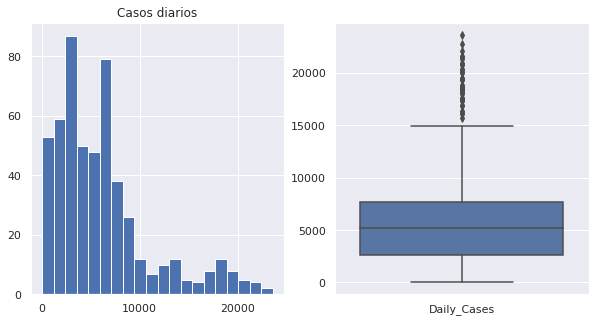

<Figure size 720x360 with 0 Axes>

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df['Daily_Cases'],bins= 20)
plt.title('Casos diarios')

plt.subplot(1,2,2)
sns.boxplot(data=df.loc[:,['Daily_Cases']])
plt.figure(figsize = (10,5))
sns.set(font_scale=1.5)
plt.show()

# Conclusiones



Gracias al analisis de datos de la base de contagios positivos diarios, podemos concluir que:
    -Normalemnte se tiene cerca de 5000 casos positivos diarios
    -Los meses de Junio, Julio, Diciembre y Enero hay más riesgos de contagio, debido a que las personas suelen salir más durante esas epocas del año.
    -Se pueden predecir un aproximado de los contagios en base a un dia especifico, debido a la correlación que estos tienen.